In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
import math as math
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate
from qiskit import Aer, execute

In [3]:
qc = QuantumCircuit(1,1)

In [40]:
# Taking an example of a new unitary gate we got out of a matrix
gate_matrix = [[1/math.sqrt(2), 1/math.sqrt(2)],
               [-1/math.sqrt(2), 1/math.sqrt(2)]]
custom_gate = Operator(gate_matrix)

In [41]:
qc.unitary(custom_gate,0)

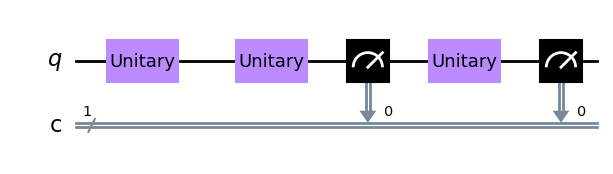

In [42]:
qc.measure(0,0)
qc.draw()

In [43]:
qc.unitary(custom_gate,0)

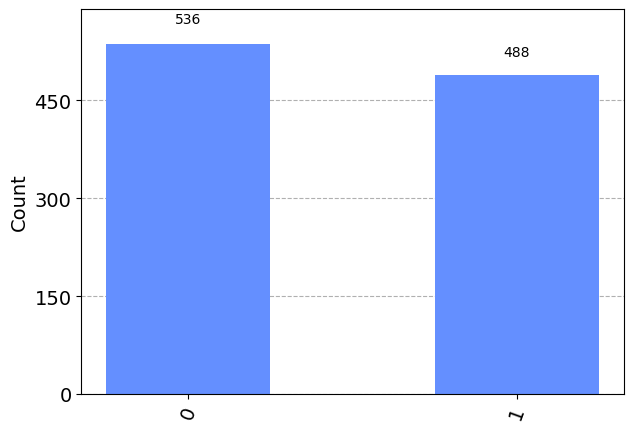

In [44]:
simulator = Aer.get_backend('aer_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts)


# General work for any matrix of the form ( a b b a)

In [45]:
import numpy as np

In [46]:
a = np.random.random()
b= 1-a
random_matrix=np.array([[a,b],[b,a]])

In [47]:
random_matrix

array([[0.65183288, 0.34816712],
       [0.34816712, 0.65183288]])

In [48]:
from numpy.linalg import eig


In [49]:
w,v=eig(random_matrix)

In [50]:
v1= v[0]
v2=v[1]

In [51]:
v1,v2

(array([ 0.70710678, -0.70710678]), array([0.70710678, 0.70710678]))

In [52]:
v1=np.array(v1)

In [53]:
matrix = np.column_stack((v1, v2))
matrix

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [54]:
Operator(matrix).is_unitary()

True

In [55]:
matrix

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [56]:
chebil_gate=Operator(matrix)
qc=QuantumCircuit(1,1)
qc.unitary(chebil_gate,0)

In [24]:

qc.measure(0,0)
qc.draw()

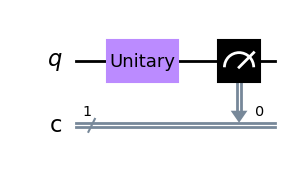

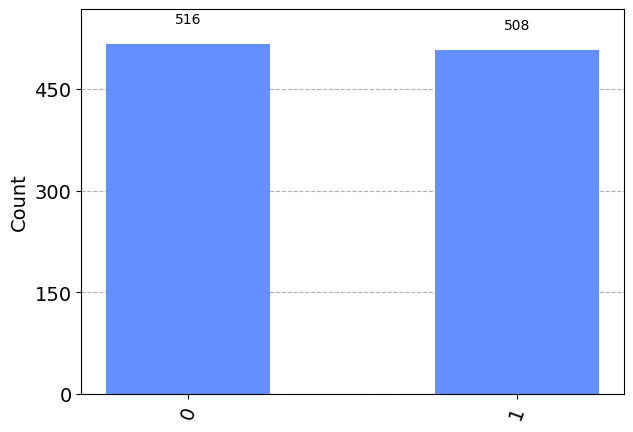

In [58]:
simulator = Aer.get_backend('aer_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts)


# Proving the gates are unitary by applying the new gate then its conjugate transpose

In [59]:
chebil_gate=Operator(matrix)
qc=QuantumCircuit(1,1)
qc.unitary(chebil_gate,0)

In [60]:
matrix2= np.matrix(matrix).getH()
qc.unitary(Operator(matrix2),0)

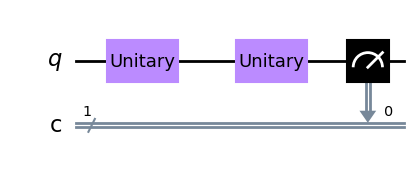

In [61]:

qc.measure(0,0)
qc.draw()

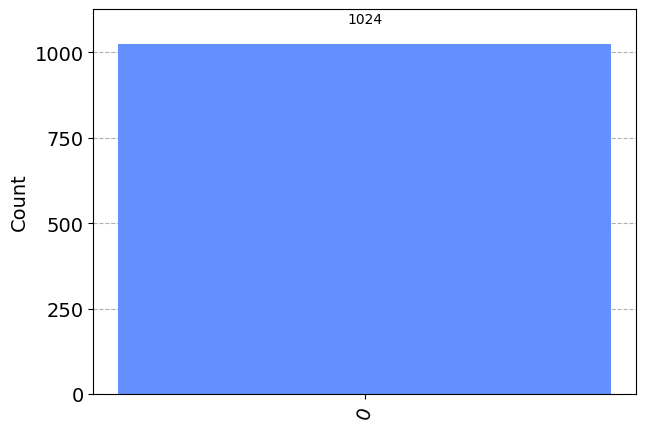

In [62]:
simulator = Aer.get_backend('aer_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts)